<a href="https://colab.research.google.com/github/yeesem2002/Machine-Learning-Project/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Procedure**

1.We will collect the Stock Data

2.Preprocess the Data - Train and Test

3.Create an Stacked LSTM Model

4.Predict the test data and plot the output

5.Predict the future 30 days and plot the output

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
### Data Collection
import pandas_datareader as pdr

In [18]:
df = pdr.get_data_tiingo('AAPL',api_key="133d0f4da6157bc71ccec3396138172f235fbad4")

<ipython-input-18-564c56a57a6e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key="133d0f4da6157bc71ccec3396138172f235fbad4")


In [7]:
df.to_csv('APPL.csv')

In [21]:
df1 = df.reset_index()['close']

In [22]:
df1

0       191.88
1       191.44
2       191.61
3       193.00
4       194.82
         ...  
1251    188.08
1252    189.77
1253    190.54
1254    190.69
1255    193.99
Name: close, Length: 1256, dtype: float64

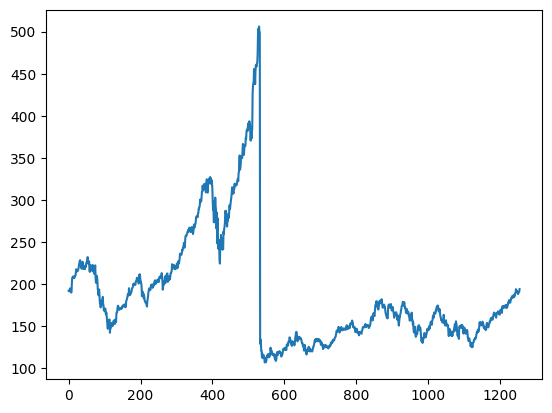

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

**##LSTM are sensitive to the scale of the data.So we need to apply MinMax Scaler**

LSTM is a type of RNN with higher memory power to remember the outputs of each node for a more extended period to produce the outcome for the next node efficiently. LSTM networks combat the RNN's vanishing gradients or long-term dependence issue.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.21299937],
       [0.21189731],
       [0.21232311],
       ...,
       [0.20964308],
       [0.21001879],
       [0.21828428]])

In [27]:
##Spliting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(816, 440)

In [29]:
len(train_data),len(test_data)

(816, 440)

In [ ]:
 #Convert